In [3]:
import pandas as pd
# Ganti 'data.parquet' dengan nama file Parquet Anda
parquet_file = 'c:\dw\provinsi.parquet'
csv_file = 'c:\dw\klaster_prov.csv'  
# Membaca file Parquet
df = pd.read_parquet(parquet_file)
# Menyimpan ke file CSV
df.to_csv(csv_file, index=False)

In [4]:
csv_file = 'c:\dw\klaster_prov.csv'
# Membaca file CSV
df = pd.read_csv(csv_file)
# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

         provinsi  cluster    avg_price_x  avg_discount_percentage  \
0  Kepulauan Riau        1  478264.445150                 0.075133   
1  Sumatera Utara        4  476403.335485                 0.075079   
2  Sumatera Barat        2  478365.924127                 0.075247   
3            Aceh        3  479632.139152                 0.074603   
4           Jambi        2  479217.440128                 0.075008   

   avg_rating_x  
0      3.995951  
1      4.002192  
2      4.002711  
3      3.996188  
4      4.002555  


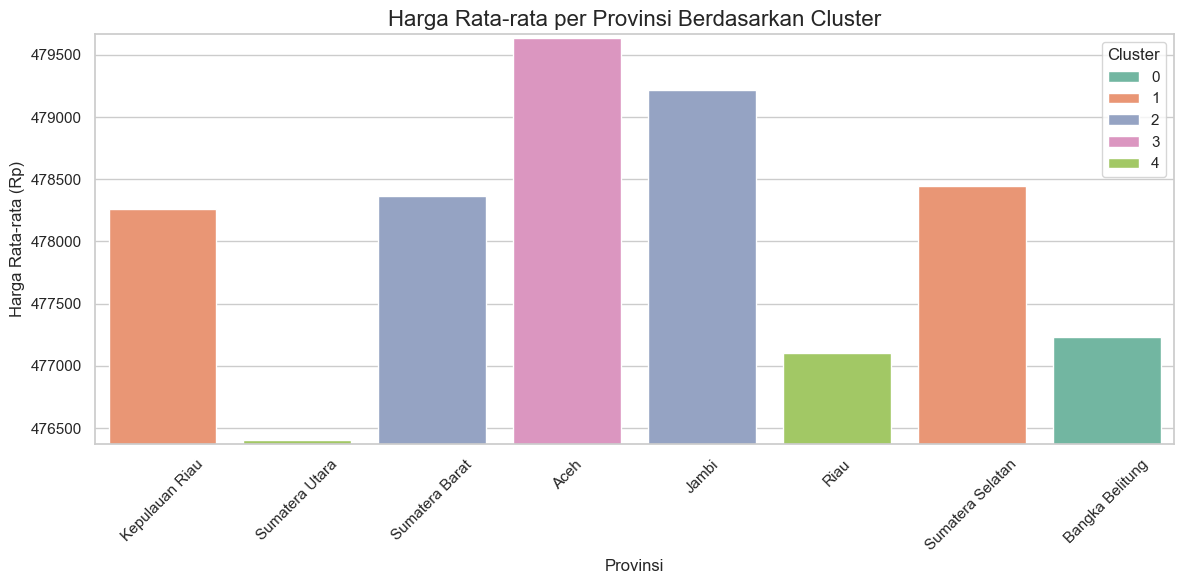

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
cluster_palette = sns.color_palette("Set2", n_colors=df['cluster'].nunique())
plt.figure(figsize=(12, 6))
min_price = df['avg_price_x'].min()
max_price = df['avg_price_x'].max()
range_price = max_price - min_price
margin = range_price * 0.01  # margin 1%
bar_plot = sns.barplot(x='provinsi', y='avg_price_x', data=df, palette=cluster_palette, hue='cluster', dodge=False)
bar_plot.set_title('Harga Rata-rata per Provinsi Berdasarkan Cluster', fontsize=16)
bar_plot.set_xlabel('Provinsi', fontsize=12)
bar_plot.set_ylabel('Harga Rata-rata (Rp)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(min_price - margin, max_price + margin)
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

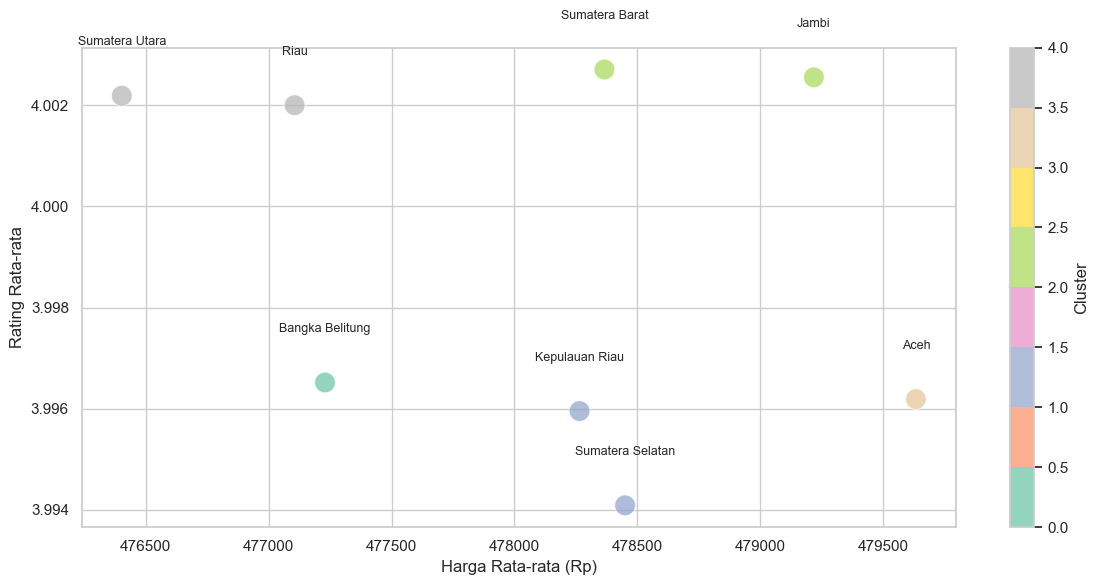

In [6]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df['avg_price_x'], df['avg_rating_x'],
    s=df['avg_discount_percentage'] * 3000,  # skala untuk visibilitas
    c=df['cluster'],  # warna berdasarkan cluster
    cmap='Set2',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.8
)
for i, row in df.iterrows():
    plt.text(row['avg_price_x'], row['avg_rating_x'] + 0.001, row['provinsi'], fontsize=9, ha='center')
plt.title(' ', fontsize=12)
plt.xlabel('Harga Rata-rata (Rp)', fontsize=12)
plt.ylabel('Rating Rata-rata', fontsize=12)
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

C:\Users\Personal Lenovo\AppData\Local\Temp\ipykernel_1960\3230654699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='avg_rating_x', data=avg_rating_cluster, palette=cluster_palette)


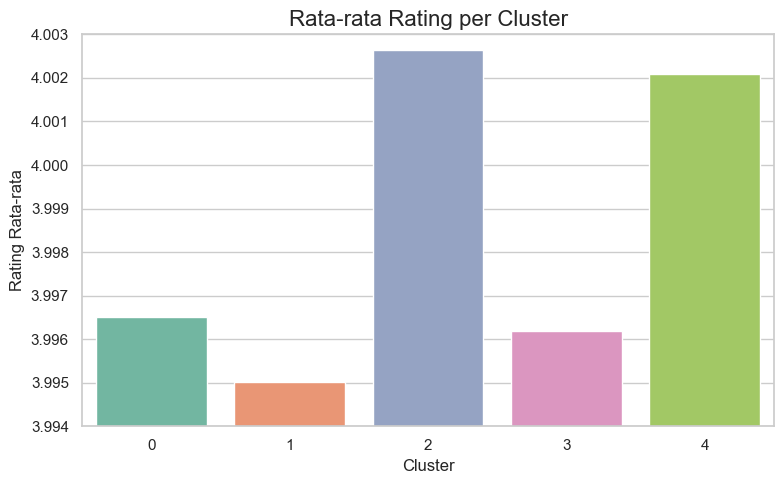

In [7]:
avg_rating_cluster = df.groupby('cluster')['avg_rating_x'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster', y='avg_rating_x', data=avg_rating_cluster, palette=cluster_palette)
plt.title('Rata-rata Rating per Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Rating Rata-rata', fontsize=12)
plt.ylim(3.994, 4.003)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
# Ganti 'data.parquet' dengan nama file Parquet Anda
parquet_file2 = 'c:\dw\harga.parquet'
csv_file2 = 'c:\dw\klaster_harga.csv'  
# Membaca file Parquet
dh = pd.read_parquet(parquet_file2)
# Menyimpan ke file CSV
dh.to_csv(csv_file2, index=False)

In [9]:
csv_file2 = 'c:\dw\klaster_harga.csv'  
# Membaca file CSV
dh = pd.read_csv(csv_file2)
dh.head()

,product_id,avg_price_y,avg_discount_percentage,avg_rating_y,avg_rating_x,avg_price_x,features,scaledFeatures,cluster
0,KF507,757500.0,0.072272,4.441028,3.964112,702753.719567,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0
1,KF180,739900.0,0.075312,4.429055,3.998752,684176.693405,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0
2,KF554,308900.0,0.076172,4.465517,3.995862,285370.341379,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",1
3,KF643,24400.0,0.075628,4.439359,3.964025,22554.682102,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",1
4,KF925,876600.0,0.073333,4.432566,4.006053,812316.000000,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0


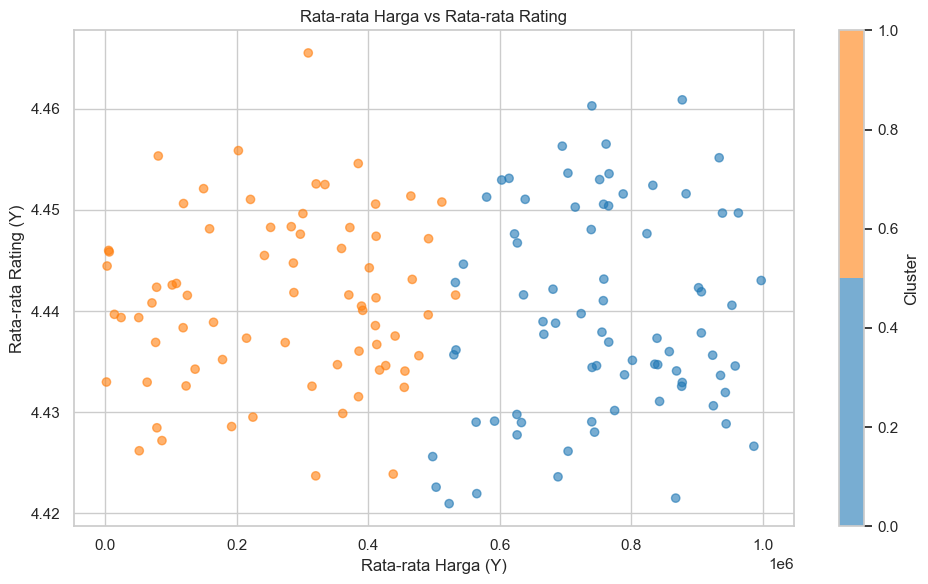

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


sns.set(style="whitegrid")

# Create a color palette with two distinct colors for the two clusters
cluster_palette = sns.color_palette(["#1f77b4", "#ff7f0e"])  # Blue and Orange
cmap = ListedColormap(cluster_palette)

# Create a scatter plot for average price vs average rating
plt.figure(figsize=(10, 6))
plt.scatter(dh['avg_price_y'], dh['avg_rating_y'], c=dh['cluster'], cmap=cmap, alpha=0.6)
# Add titles and labels

plt.title('Rata-rata Harga vs Rata-rata Rating')
plt.xlabel('Rata-rata Harga (Y)')
plt.ylabel('Rata-rata Rating (Y)')
plt.grid(True)

# Add a color bar to indicate clusters
plt.colorbar(label='Cluster')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()